<img src= "https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px"> 
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Image processing </h1> 
<h2 style = "text-align:center"> Comment effectuer des transformations sur une image </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Contexte et objectif

> En datascience, quand vous travaillez sur des problématiques utilisant des images vous aurez besoin de savoir comment faire des transformations sur vos images en amont de l'utilisation d'un modèle. Ces transformations ont pour but d'essentialiser l'information, de retravailler l'image pour obtenir une meilleure compréhension de la part de votre algorithme. 
>
> L'objectif de ce notebook est de découvrir des manipulations simples, des filtres et des techniques de seuil à utiliser avec la librairie OpenCV.
>
> Commençons par la phase d'importation des packages.

* Importer les packages **`numpy`**, **`cv2`**, **`random`** et **`pyplot`**.

* Lire, en couleur, l'image *street* qui est au format *.jpg*, la stocker dans une variable nommée **`img_color`** et l'afficher.

> Très souvent quand nous faisons face à des problématiques de classification d'images par exemple, nous avons besoin de faire ce que nous appelons de l'augmentation de données. 
>
> L'œil humain que je lui donne un immeuble ou une rue à l'endroit ou à l'envers sera toujours capable de faire la différence et de les reconnaître. Concernant des algorithmes complexes comme les réseaux de neurones ce n'est pas aussi simple. Donnez-lui 15000 images d'immeubles à l'endroit, il saura reconnaître un immeuble à l'endroit. Cependant donnez-lui une image d'immeuble tournée à l'envers ou bien à 90 degrés par exemple, il aura du mal à reconnaître l'immeuble. L'augmentation de données consiste, si on reprend notre exemple, à modifier parmi les 15000 images certaines, comme par exemple, les tourner à 90 degrés ou bien les retourner verticalement dans le but d'améliorer les performances d'un modèle complexe. 
>
> La librairie OpenCV (**`cv2`**) offre des fonctions simples d'utilisation pour effectuer des modifications de base comme par exemple effectuer une rotation de l'image. 
>
> Pour tourner une image selon un angle prédéfini vous aurez besoin de deux fonctions de **`cv2`** : 
* **`cv2.getRotationMatrix2D`** : permet de déterminer la matrice transformation nécessaire pour effectuer la rotation. Vous devez renseigner 3 éléments : les coordonnées du centre de l'image, l'angle de rotation et le niveau d'échelle. 
* **`cv2.warpAffine`** : pour appliquer la transformation affine à l'image. Vous devez renseigner 3 éléments : l'image sur laquelle effectuer la transformation, la matrice de transformation et enfin la longueur et la largeur de l'image en sortie.
>
> Pour effectuer une rotation sans changer l'échelle ou la taille de l'image il suffit de fixer à 1 le niveau d'échelle et dans la transformation affine renseigner les longueur et largeur d'origine.
>
> <span style="color:#09b038; text-decoration : underline"> Exemple : Rotation d'une image </span><br>
```python 
    long, large = mon_image.shape[:2]
    M = cv2.getRotationMatrix2D((int(long/2), int(large/2)), angle, 1)
    mon_image = cv2.warpAffine(mon_image, M, (long, large)) #pour tourner à 45 degrés mon_image```
    
* Tourner **`img_color`** à 90 degré, stocker l'image dans une variable nommée **`img_rotate`** et l'afficher.

> Une modification simple à réaliser est également ce que nous appelons un flip vertical ou horizontal. Il s'agit de retourner verticalement ou horizontalement l'image. 
>
> La fonction **`flip`** de **`cv2`** permet de le faire très facilement. Il suffit de renseigner l'image que vous souhaitez flip et 0 (vertical) ou 1 (horizontal). 
>
> <span style="color:#09b038; text-decoration : underline"> Exemple : flip d'une image </span><br>
```python 
    mon_image = cv2.flip(mon_image,1) #pour flip horizontalement mon_image```
    
* Flip verticalement **`img_color`** et l'afficher

> Vous pouvez également zoomer l'image. Il s'agit simplement d'isoler une partie de l'image comme par exemple un immeuble. Il suffit de redimensionner l'image en renseignant la zone à isoler. 
>
> Etant donné que nous allons redimensionner l'image nous nous servirons donc de **`resize`** qui est la fonction dédiée pour ça dans **`cv2`**. 
>
> Pour pouvoir zoomer il suffit de renseigner les coordonnées de la zone sur laquelle on souhaite effectuer un zoom. Ensuite il suffit de sous-sélectionner les pixels de la zone souhaitée. Voici un exemple si on souhaite isoler la partie en bas à gauche de l'image : 
```python 
long, larg = img_color.shape[:2]
long_z = int(0.5*long)
larg_z = int(0.5*larg)
long_deb = 80
larg_deb = 80
img_zoom = img_color[long_deb:long_deb + long_z, larg_deb:larg_deb + larg_z, :] #pour isoler le coin gauche de img_color```
>
> Il est important d'utiliser la fonction **`resize`** pour redimensionner l'image aux dimensions de la partie zoomée

* Zoomer sur la partie supérieure gauche de l'image et afficher

> OpenCV (**`cv2`**) en plus de modifications de base permet également, à l'aide de différentes fonctions, d'effectuer des filtrages sur l'image. Les filtres d'image peuvent être utilisés pour réduire la quantité de bruit dans une image et pour améliorer les bords d'une image. Il s'agit de supprimer les bords de faible intensité. Il peut également être utilisé pour masquer les détails d'une image et donc à terme améliorer les performances d'un algorithme de classification par exemple. 
>
> Prenons un exemple simple de filtre : la moyenne. Pour ce faire, on effectue une convolution de l'image avec un filtre à boîte normalisée. Il prend simplement la moyenne de tous les pixels sous la zone du noyau et remplace l'élément central par cette moyenne. 
>
> Le produit de convolution est un produit particulier qui s'effectue avec des matrices. D'un côté nous avons une matrice d'entrée (notre image) de l'autre nous avons un noyau de convolution (notre filtre). Pour calculer le produit de convolution il est indispensable que les deux matrices aient les mêmes dimensions. Les étapes du produit de convolution sont les suivantes : 
* Produit terme à terme des deux matrices.
* Somme des produits.
>
> Dans l'animation suivante nous illustrons le produit de convolution entre une matrice d'entrée et un noyau de convolution de dimensions 3x3.

* Pour interagir avec la figure, cliquez sur le bouton Next pour aller à l'étape suivante et Reset pour redémarrer l'animation.

In [ ]:
from interaction_cnn import show_one_operation_conv
show_one_operation_conv()

> Comme nous avons pu le voir précédemment une image est une matrice de pixels. Nous pouvons lui appliquer un produit de convolution et donc un filtre. Pour effectuer cette opération sur une image entière, il faut d'abord la découper en **plusieurs matrices de mêmes dimensions que le noyau de convolution que nous voulons utiliser**. Ensuite, nous pouvons effectuer le produit de convolution entre chaque matrice et le noyau.
>
> Dans la figure suivante nous illustrons la convolution d'une image de dimensions 4x4 par un noyau de convolution de dimensions 3x3:
* Etape 1: Découpage de l'image en plusieurs matrices convolables. Chaque matrice a une couleur différente.
* Etape 2: Produits de convolutions entre chaque matrice et le noyau.
* Etape 3: Activation et concaténation des produits en une nouvelle matrice.

* Executer la cellule suivante pour afficher l'interaction

In [1]:
from interaction_cnn import show_operation_conv
show_operation_conv()

ModuleNotFoundError: No module named 'bqplot'

> Pour appliquer un filtre nommé averaging ou moyenne, on peut utiliser la fonction **`blur`** de **`cv2`**. Elle détermine directement le noyau de convolution nécessaire et renvoie l'image filtrée. 
>
> Pour utiliser la fonction **`blur`** correctement il est nécessaire de renseigner l'image que l'on souhaite filtrée et également la dimension du filtre souhaité. Plus la dimension est élevée plus vous risquez de trop simplifier l'image et de perdre en information. L'objectif d'un filtre reste de se débarrasser des informations non nécessaires pour ne garder que le plus pertinent de l'image. 
>
> L'argument **ksize** permet de renseigner la dimension souhaitée du noyau de convolution utilisé. Vous trouverez des informations plus détaillées sur la manière dont est calculé le noyau de convolution utilisé dans la fonction **`blur`** [ici](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37).
>
> <span style="color:#09b038; text-decoration : underline"> Exemple : utilisation de **blur** </span><br>
```python 
    mon_filtre = cv2.blur(mon_image,ksize = (3,3))#pour filtrer mon_image avec un noyau de convolution de dimension 3x3```

* En utilisant la fonction **`blur`** de **`cv2`**, filtrer **`img_color`** et afficher le résultat

> Pour comprendre d'autant plus l'intérêt des filtres, nous allons créer une image **`img_sp_noise`** dans laquelle nous allons ajouter volontairement ce qu'on appelle du bruit poivre et sel. Il s'agit simplement de transformer aléatoirement certains pixels de couleur, en pixel noir ou blanc.

* Exécuter une fois la cellule de code suivante

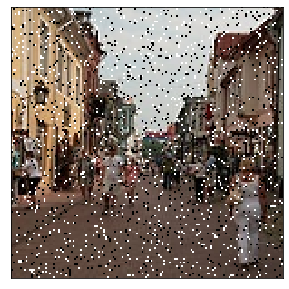

In [ ]:
salt_value = 20

noise = np.random.randint(salt_value+1, size=(150, 150))
img_sp_noise = img_color.copy()

#---------- Poivre---#

indexe = np.where(noise == 0)

A = indexe[0]
B = indexe[1]

img_sp_noise[A,B,:] = 0

#---------- Sel---------#

indexe = np.where(noise == salt_value)

A = indexe[0]
B = indexe[1]

img_sp_noise[A,B,:] = 255

plt.figure(figsize = (8,5))

plt.imshow(img_sp_noise)
plt.xticks([])
plt.yticks([])

plt.show();

> Nous avons donc maintenant une image contenant aléatoirement des pixels blanc ou noir, ce qui nuit à la qualité de l'image et aux informations qu'elle contient. Il est important, si on souhaite par la suite avoir une bonne compréhension, d'utiliser des méthodes de filtrage pour essayer d'améliorer la qualité de l'image. 
>
> Une méthode simple et efficace consiste à utiliser la fonction **`medianBlur`** de **`cv2`**. Elle permet de corriger efficacement le bruit poivre et sel. Cette fonction calcule la médiane de tous les pixels sous la fenêtre du noyau et le pixel central est remplacé par cette valeur médiane. Vous trouverez plus d'informations sur la méthode de calcul du noyau de convolution associé à ce filtre [ici](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)
>
> L'argument **ksize** permet de préciser la dimension du noyau de convolution utilisé pour le filtre. 
>
> <span style="color:#09b038; text-decoration : underline"> Exemple : utilisation de **medianBlur** </span><br>
```python 
    mon_filtre = cv2.medianBlur(mon_image, ksize = 3) #pour filtrer mon_image avec un noyau de convolution de dimension 3x3```

* En utilisant la fonction **`medianBlur`** de **`cv2`**, filtrer **`img_sp_noise`** et afficher le résultat

> Un autre filtre, **`GaussianBlur`**, est lui utilisé pour supprimer le bruit gaussien présent dans l'image. Comme pour **`medianBlur`** son utilisation est simple. Comme pour un filtre classique un noyau de convolution est préalablement calculé par la fonction aux dimensions demandées. Ensuite il s'effectue un produit de convolution entre l'image et le noyau de convolution calculé pour filtrer l'image.
>
> L'argument **ksize** permet de préciser la dimension du noyau de convolution utilisé pour le filtre. 
>
> <span style="color:#09b038; text-decoration : underline"> Exemple : utilisation de **GaussianBlur** </span><br>
```python 
    mon_filtre = cv2.GaussianBlur(mon_image, ksize = (3,3), sigmaX = 0) #pour filtrer et éliminer le bruit gaussien de mon_image```

* En utilisant **`GaussianBlur`**, filtrer **`img_color`** et afficher

> En plus des filtres, il existe des techniques dites de seuil s'effectuant sur des images en niveaux de gris. Si la valeur d'un pixel est supérieure à une valeur seuil, on lui attribue une valeur (qui peut être blanche), sinon on lui attribue une autre valeur (qui peut être noire). La fonction utilisée est **`threshold`** de **`cv2`**. Le premier argument est l'image source, qui doit être une image en niveaux de gris. Le deuxième argument est la valeur de seuil qui est utilisée pour classer les valeurs des pixels. Le troisième argument est le maxVal qui représente la valeur à donner si la valeur des pixels est supérieure (parfois inférieure) à la valeur de seuil. OpenCV fournit différents styles de seuillage et il est décidé par le quatrième paramètre de la fonction. Les différents types sont :
* **cv2.THRESH_BINARY** : Si l'intensité du pixel est supérieure au seuil fixé, la valeur est fixée à 255, sinon à 0 (noir).
* **cv2.THRESH_BINARY_INV** : Le même principe que cv2.THRESH_BINARY mais inversé.
* **cv2.THRESH_TRUNC** : Si la valeur de l'intensité du pixel est supérieure au seuil, elle est tronquée au seuil. Les valeurs des pixels sont fixées de manière à être identiques au seuil. Toutes les autres valeurs restent les mêmes.
* **cv2.THRESH_TOZERO** : L'intensité des pixels est fixée à 0, pour toutes les intensités de pixels, inférieure à la valeur seuil.
* **cv2.THRESH_TOZERO_INV** : Le même principe que cv2.THRESH_TOZERO mais inversé.
>
> La fonction renvoie deux éléments : le seuil utilisé et l'image après utilisation de la technique de seuillage.
>
> <span style="color:#09b038; text-decoration : underline"> Exemple : utilisation de **threshold** </span><br>
```python 
    seuil,img_seuillage = cv2.threshold(mon_image,150,255,type = cv2.THRESH_BINARY) #pour retravailler mon_image avec une technique dite de seuillage```
    
* Lire, en niveaux de gris, l'image building qui est au format .jpg, la stocker dans une variable nommée **`img_gray`**
* En utilisant la fonction **`threshold`** et le style de seuillage **cv2.THRESH_BINARY**, appliquer un seuillage à **`img_gray`** en fixant le seuil à 115 et la **maxVal** à 255
* Afficher l'image après application du seuillage

> Par l'utilisation de cette technique, nous avons réussi à mettre en avant la structure de l'immeuble qui apparaît plus nettement. Nous pouvons encore améliorer le résultat en utilisant une autre fonction.
>
> Avec la fonction **`threshold`**, nous avons utilisé une valeur globale comme valeur seuil. Mais elle peut ne pas être bonne dans toutes les conditions où l'image présente des conditions d'éclairage différentes dans des zones différentes. Dans ce cas, nous avons opté pour un seuillage adaptatif. L'algorithme calcule le seuil pour de petites régions de l'image. Ainsi, nous obtenons différents seuils pour différentes régions de la même image et cela nous donne de meilleurs résultats pour des images avec un éclairage variable.
>
> La fonction **`adaptiveThreshold`** de **`cv2`** permet de faire cela facilement. Elle contient 3 paramètres supplémentaires : 
* **adaptiveMethod** : La méthode adaptative détermine le mode de calcul de la valeur seuil. Deux choix sont possibles : cv2.ADAPTIVE_THRESH_MEAN_C (Moyenne des valeurs de la zone de voisinage) ou cv2.ADAPTIVE_THRESH_GAUSSIAN_C (Somme pondérée gaussienne des valeurs des pixels voisins).
* **blockSize** : décide de la taille de la zone de voisinage.
* **C** : Une valeur constante qui est soustraite de la moyenne ou de la somme pondérée des pixels du voisinage.
>
> <span style="color:#09b038; text-decoration : underline"> Exemple : utilisation de **adaptiveThreshold** </span><br>
```python 
    img_seuillage = cv2.adaptiveThreshold(mon_image,255,
                                          adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          thresholdType = cv2.THRESH_BINARY,
                                          blockSize = 3,
                                          C = 2)```

* En utilisant la fonction **`adaptiveThreshold`**, appliquer un seuillage adaptable à **`img_gray`** avec   **adaptiveMethod**, **Block Size** et C respectivement égal à **cv2.ADAPTIVE_THRESH_GAUSSIAN_C**, 3 et 2
* Afficher l'image après application du seuillage

> Nous obtenons un meilleur rendu que lors de notre première tentative avec un seuil global. Ces modifications sont utiles si nous souhaitons déceler des structures particulières toujours dans le but d'améliorer par exemple les performances d'un algorithme de classification.

### Conclusion

>Dans ce notebook vous aurez appris à :
>
>* Effectuer des modifications simples sur des images à l'aide fonctions de la librairie **`cv2`**.
>* Effectuer des filtrages simples à l'aide de fonctions de la librairie **`cv2`** comme **`medianBlur`** pour corriger le >bruit présent dans une image.
>* Utiliser des méthodes de seuil pour déceler des structures particulières.